In [5]:
import tweepy, re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
#authentication
consumerKey = 'Javavx8YLf0TLDcsSQZlnPMN5'
consumerSecret = 'vzzeLqEJx2sGSyZu2UnH4T7w4MPYH6yxRLfGI5WQXdPjfRY5R6'
accessToken = '1316978914544164869-eLoidJJgknQSPcmGlfSCYwM3jJwCJ7'
accessTokenSecret ='rRCNvNHPQfGtgdsGbA0dDNkeXhUoULHk3P76Adi7tR1kt'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [7]:
#input for term to be searched and how many tweets to search
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to be searched: "))

tweets = []
tweetText = []

#searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm+" -filter:retweets", lang = 'en').items(NoOfTerms)

Enter Keyword/Tag to search about: Anushka Sharma
Enter how many tweets to be searched: 20


In [8]:
tweet_list = [tweet.text for tweet in tweets]
tweet_df = pd.DataFrame(tweet_list)
tweet_df

,0
0,"test4 Some ""Nice Photos"" Of Anushka Sharma Fro..."
1,Athiya Shetty turns photographer as Anushka Sh...
2,hey universe I'm once again asking for Hrithik...
3,10 hottest scenes of #AnushkaSharma https://t....
4,Anushka Sharma turns muse for new BFF Athiya S...
5,Athiya Shetty turns photographer as Anushka Sh...
6,Beautiful pictures of smiling and smiling Anus...
7,Anushka Sharma turns muse for Athiya Shetty ov...
8,Athiya Shetty turns photographer as Anushka Sh...
9,Athiya Shetty turns photographer as Anushka Sh...


In [9]:
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [10]:
tweet_df.head()

,0,cleaned_data
0,"test4 Some ""Nice Photos"" Of Anushka Sharma Fro...",test4 Some Nice Photos Of Anushka Sharma From ...
1,Athiya Shetty turns photographer as Anushka Sh...,Athiya Shetty turns photographer as Anushka Sh...
2,hey universe I'm once again asking for Hrithik...,hey universe I m once again asking for Hrithik...
3,10 hottest scenes of #AnushkaSharma https://t....,10 hottest scenes of AnushkaSharma
4,Anushka Sharma turns muse for new BFF Athiya S...,Anushka Sharma turns muse for new BFF Athiya S...


In [11]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)

In [12]:
tweet_df.head()

,0,cleaned_data
0,"test4 Some ""Nice Photos"" Of Anushka Sharma Fro...",test Some Nice Photos Of Anushka Sharma From H...
1,Athiya Shetty turns photographer as Anushka Sh...,Athiya Shetty turns photographer as Anushka Sh...
2,hey universe I'm once again asking for Hrithik...,hey universe I m once again asking for Hrithik...
3,10 hottest scenes of #AnushkaSharma https://t....,hottest scenes of AnushkaSharma
4,Anushka Sharma turns muse for new BFF Athiya S...,Anushka Sharma turns muse for new BFF Athiya S...


In [15]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)

In [17]:
tweet_df['cleaned_data'].values

array(['test some nice photo of anushka sharma from her outing with friend athiya',
       'athiya shetty turn photographer a anushka sharma drop some nice photo',
       'hey universe i m once again asking for hrithik roshan and anushka sharma in a romantic movie together',
       'hottest scene of anushkasharma',
       'anushka sharma turn muse for new bff athiya shetty share pic from uk people news',
       'athiya shetty turn photographer a anushka sharma drop some nice photo',
       'beautiful picture of smiling and smiling anushka sharma surfaced from london vamika wa not seen',
       'anushka sharma turn muse for athiya shetty over weekend in london via',
       'athiya shetty turn photographer a anushka sharma drop some nice photo',
       'athiya shetty turn photographer a anushka sharma drop some nice photo',
       'anushka sharma is in love with india s star weightlifter mirabai chanu s olympic ring shaped earring gifted by her',
       'athiya shetty turn photographer a

In [19]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)

In [20]:
tweet_df['cleaned_data'].values

array(['test nice photo anushka sharma outing friend athiya',
       'athiya shetty turn photographer anushka sharma drop nice photo',
       'hey universe asking hrithik roshan anushka sharma romantic movie together',
       'hottest scene anushkasharma',
       'anushka sharma turn muse new bff athiya shetty share pic uk people news',
       'athiya shetty turn photographer anushka sharma drop nice photo',
       'beautiful picture smiling smiling anushka sharma surfaced london vamika wa seen',
       'anushka sharma turn muse athiya shetty weekend london via',
       'athiya shetty turn photographer anushka sharma drop nice photo',
       'athiya shetty turn photographer anushka sharma drop nice photo',
       'anushka sharma love india star weightlifter mirabai chanu olympic ring shaped earring gifted',
       'athiya shetty turn photographer anushka sharma drop nice photo via',
       'athiyashetty turn photographer anushkasharma england',
       'beautiful picture smiling smiling

In [21]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)

In [22]:
tweet_df['polarity'].value_counts()

Positive             8
Neutral              6
Strongly Positive    4
Weakly Positive      1
Weakly Negative      1
Name: polarity, dtype: int64

In [23]:
tweet_df.dtypes

0               object
cleaned_data    object
polarity        object
dtype: object

In [25]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,20):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1

In [26]:
#finding average reaction
polarity = polarity / NoOfTerms
polarity

0.4077272727272726

In [27]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

In [28]:
 # finding average of how people are reacting
positive = percentage(positive, NoOfTerms)
wpositive = percentage(wpositive, NoOfTerms)
spositive = percentage(spositive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
wnegative = percentage(wnegative, NoOfTerms)
snegative = percentage(snegative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

In [29]:
 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on Anushka Sharma by analyzing 20 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Positive

------------------------------------------------------------------------------------------

Detailed Report: 
40.00% people thought it was positive
5.00% people thought it was weakly positive
20.00% people thought it was strongly positive
0.00% people thought it was negative
5.00% people thought it was weakly negative
0.00% people thought it was strongly negative
30.00% people thought it was neutral


In [30]:
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 
          'Strongly Negative [' + str(snegative) + '%]']

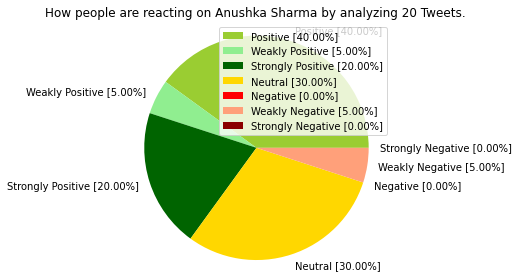

In [31]:
plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()